La \textit{pureza} de un estado cuántico es una medida de cuán "puro" o "mixto" es el estado. Para un estado cuántico descrito por una matriz de densidad $\rho$, la pureza se define como la traza del cuadrado de la matriz de densidad, es decir:

\begin{equation}
\text{Pureza}(\rho) = \text{Tr}(\rho^2)
\end{equation}

Un estado puro es aquel que puede ser descrito por un único vector de estado, y para estos estados, la pureza es 1. Por otro lado, un estado mixto es una combinación estadística de diferentes estados puros, y para estos estados, la pureza es menor que 1.

En el contexto de la computación cuántica, los estados puros son aquellos que podemos preparar y manipular directamente, mientras que los estados mixtos suelen ser el resultado de la interacción de nuestros qubits con el entorno, un proceso conocido como decoherencia. La pureza de nuestros estados cuánticos es entonces una medida de cuánta decoherencia ha ocurrido.


In [79]:
from qiskit.quantum_info import DensityMatrix
from IPython.display import display, Math

def pureza(rho):
    # Convierte la matriz de densidad a un array de NumPy
    rho = np.array(rho.data)

    # Calcula la traza del cuadrado de la matriz de densidad
    return np.trace(rho @ rho)


In [63]:
import numpy as np
from qiskit import QuantumCircuit, transpile, execute
from qiskit.providers.aer import Aer
from qiskit.visualization import plot_state_city
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.quantum_info import DensityMatrix
from qiskit import QuantumCircuit
from IPython.display import display



# Estados de Bell y sus Matrices de Densidad (Estados puros)
 


Los estados de Bell son un conjunto de estados cuánticos de dos qubits que son máximamente entrelazados. Son fundamentales en la teoría de la información cuántica y se utilizan en muchos protocolos cuánticos, como la teleportación cuántica y la criptografía cuántica.

Hay cuatro estados de Bell, que se pueden escribir en la base computacional como:

\begin{align*}
|\Phi^+\rangle & = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \\
|\Phi^-\rangle & = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle) \\
|\Psi^+\rangle & = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle) \\
|\Psi^-\rangle & = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)
\end{align*}

La matriz de densidad de un estado cuántico es una representación más general que el vector de estado. Para un estado cuántico puro, como los estados de Bell, la matriz de densidad es simplemente el producto exterior del vector de estado con su conjugado complejo.

En el caso de los estados de Bell, la matriz de densidad tiene elementos no nulos en las posiciones correspondientes a las combinaciones de los estados de la superposición. Por ejemplo, para el estados \(|\Phi^+\rangle\), la matriz de densidad tiene elementos no nulos en las posiciones (00, 00), (00, 11), (11, 00) y (11, 11), que corresponden a las combinaciones de los estados |00⟩ y |11⟩.

Los elementos fuera de la diagonal de la matriz de densidad, conocidos como elementos de coherencia, representan las correlaciones cuánticas (entrelazamiento) entre los dos qubits. En el caso de los estados de Bell, estos elementos de coherencia son máximos, lo que refleja el hecho de que estos estados están máximamente entrelazados.


<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

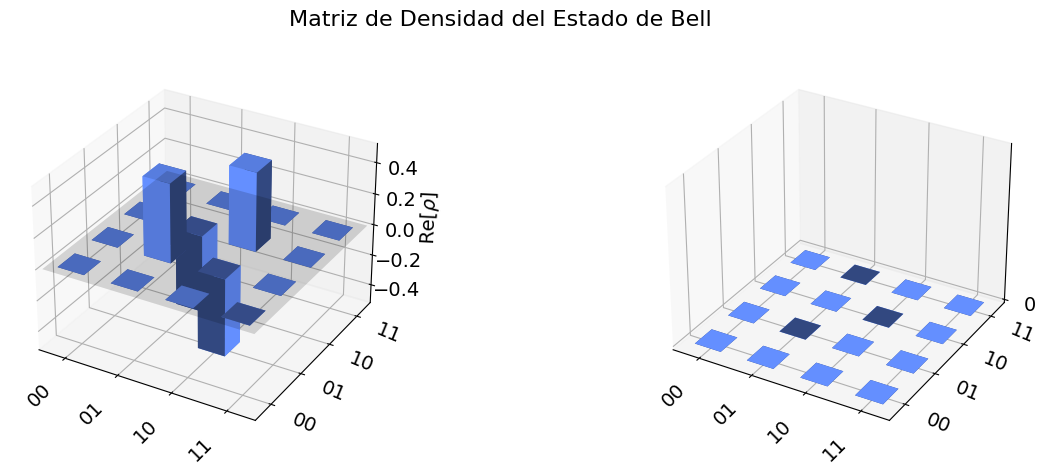

In [94]:
def estado_bell(index, debug=False):
    # Crea un circuito cuántico con dos qubits
    qc = QuantumCircuit(2)

    # Aplica una puerta H al primer qubit para crear una superposición
    qc.h(0)

    # Dependiendo del índice, aplica diferentes puertas para generar el estado de Bell correspondiente
    if index == 0:  # |Φ+⟩
        qc.cx(0, 1)
    elif index == 1:  # |Φ-⟩
        qc.cx(0, 1)
        qc.z(1)
    elif index == 2:  # |Ψ+⟩
        qc.cx(0, 1)
        qc.x(1)
    elif index == 3:  # |Ψ-⟩
        qc.cx(0, 1)
        qc.z(1)
        qc.x(1)
    else:
        raise ValueError("El indice debe ser 0, 1, 2, or 3")

    # Si debug es True, dibuja el circuito
    if debug:
        display(qc.draw('mpl'))
        
    return qc

qc = estado_bell(3)

# Ejecuta el circuito para obtener el estado final
vector_estado = Statevector.from_instruction(qc)
array_vector_estado = vector_estado.data
display(array_to_latex(array_vector_estado, prefix="\\text{Vector de estado } |\\psi\\rangle = "))

rho_01 = np.outer(state.data, np.conj(state.data)) #calcula el producto exterior del vector de estado con su conjugado complejo

#Calcula la pureza del sistema completo
pureza_estado_bell = pureza(rho_01)
display(Math(r'\text{{Pureza del estado de Bell: }} {:.2f}'.format(pureza_estado_bell)))

display(array_to_latex(DensityMatrix(rho_01),prefix="\\text{Matriz de densidad } \\rho_{01} = "))

plot_state_city(rho_01, title="Matriz de Densidad del Estado de Bell")


# Estados mixtos o mezclas 


Los estados mixtos en mecánica cuántica son una descripción estadística de un conjunto de estados posibles donde cada estado se puede presentar con una cierta probabilidad. A diferencia de los estados puros, que se describen con un único vector de estado, los estados mixtos se describen con una matriz de densidad.

En el código proporcionado, se genera un estado mixto específico de dos qubits, que es una combinación de los estados |00⟩ y |11⟩. La matriz de densidad de este estado mixto se calcula como una combinación convexa de las matrices de densidad de los estados |00⟩ y |11⟩, ponderada por las probabilidades \(p\) y \(1-p\), respectivamente.

\begin{equation}
\rho_{\text{mixto}} = p \cdot \rho_{00} + (1 - p) \cdot \rho_{11}
\end{equation}


La matriz de densidad resultante tiene elementos no nulos solo en las posiciones correspondientes a los estados |00⟩ y |11⟩. Esto refleja el hecho de que el estado mixto es una mezcla de estos dos estados. Los elementos fuera de la diagonal son cero, lo que indica que no hay coherencias (entrelazamiento) en este estado mixto.

En términos más generales, un estado mixto representa una situación en la que no tenemos un conocimiento completo del estado de nuestro sistema cuántico. En lugar de saber exactamente en qué estado se encuentra nuestro sistema (como sería el caso de un estado puro), solo sabemos las probabilidades de que el sistema se encuentre en varios estados diferentes. En este caso, solo sabemos que nuestro sistema de dos qubits está en el estado |00⟩ con probabilidad \(p\) y en el estado |11⟩ con probabilidad \(1-p\).


p = 0.2:


<IPython.core.display.Math object>

<IPython.core.display.Latex object>

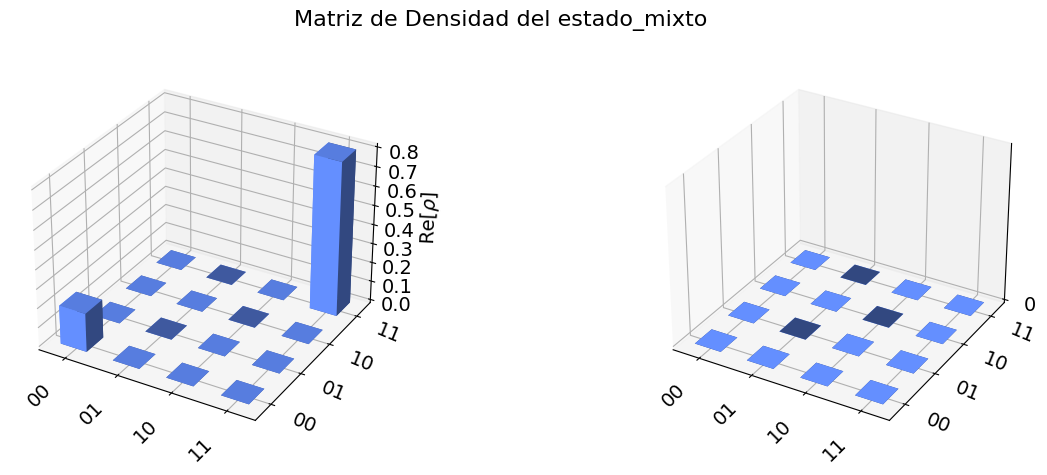

In [81]:
def estado_mixto(p):
    # Genera los estados |00> y |11>
    estado_00 = np.array([1, 0, 0, 0])
    estado_11 = np.array([0, 0, 0, 1])

    # Calcula las matrices de densidad de los estados |00> y |11>
    rho_00 = np.outer(estado_00, estado_00)
    rho_11 = np.outer(estado_11, estado_11)

    # Calcula el estado mixto
    rho_mixto = p * rho_00 + (1 - p) * rho_11

    # Devuelve el estado mixto como una matriz de densidad
    return rho_mixto
p=0.2
rho_mixto = estado_mixto(p)
print(f"p = {p}:")

pureza_mixto = pureza(rho_mixto)
display(Math(r'\text{{Pureza del mixto: }} {:.2f}'.format(pureza_mixto)))

display(array_to_latex(DensityMatrix(rho_mixto),prefix="\\text{Matriz de densidad} = "))
rho_mixto_dm = DensityMatrix(rho_mixto)  # Convierte rho_mixto a un objeto DensityMatrix
plot_state_city(rho_mixto_dm , title="Matriz de Densidad del estado_mixto")


# Estado con valores imaginarios en la matriz de densidad


No todas las matrices de densidad tienen solo valores reales, vamos a generar una que si tenga valores imaginarios. El estado cuántico generado en este código es un estado entrelazado de dos qubits que combina una superposición y una fase imaginaria. La construcción del estado se realiza mediante los siguientes pasos:

1. **Superposición**: Se aplica una puerta de Hadamard (H) al primer qubit, creando una superposición de los estados |0⟩ y |1⟩.

2. **Fase Imaginaria**: Se aplica una puerta S al primer qubit, que agrega una fase imaginaria al estado |1⟩. La puerta S transforma el estado |1⟩ en i|1⟩, donde i es la unidad imaginaria.

3. **Entrelazamiento**: Se aplica una puerta CNOT con el primer qubit como control y el segundo como objetivo. Esto entrelaza los dos qubits, creando un estado que no puede describirse como el producto de dos estados separados.

\begin{equation}
|\psi\rangle = \frac{1}{\sqrt{2}} \left( |00\rangle + i |01\rangle \right)
\end{equation}

El vector de estado resultante describe completamente el estado cuántico del sistema. La matriz de densidad, que se calcula como el producto exterior del vector de estado con su conjugado complejo, ofrece otra representación del estado. En este caso, la matriz de densidad tiene elementos complejos fuera de la diagonal, lo que refleja la presencia de una fase imaginaria en el estado.

Los elementos fuera de la diagonal de la matriz de densidad, conocidos como elementos de coherencia, representan las correlaciones cuánticas (entrelazamiento) entre los dos qubits. En este caso, estos elementos de coherencia son complejos debido a la fase imaginaria introducida por la puerta S.

La visualización de la matriz de densidad proporciona una representación gráfica de estos elementos, mostrando tanto la magnitud como la fase de cada elemento en la matriz.


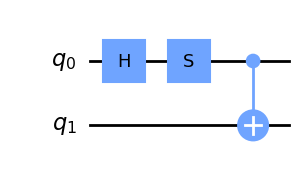

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

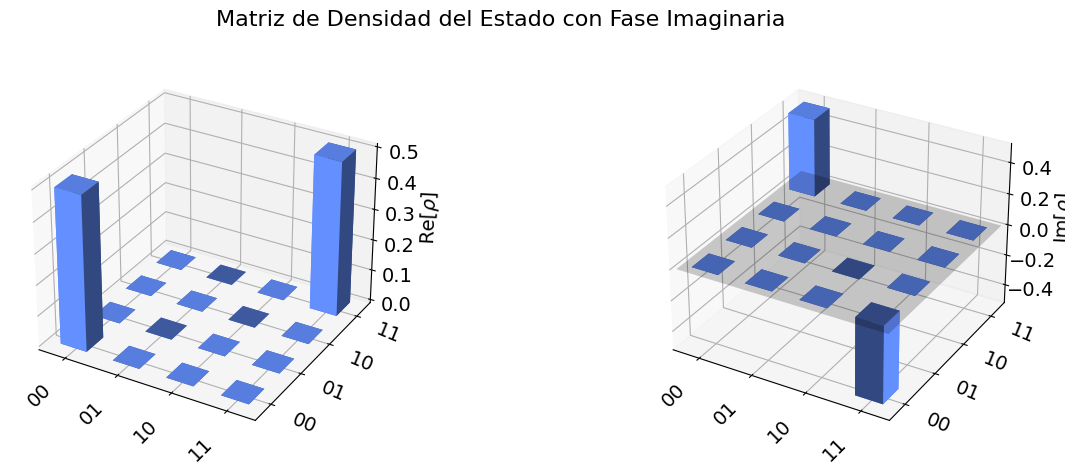

In [82]:
def estado_superposicion_con_fase_imaginaria(debug=False):
    # Crea un circuito cuántico con dos qubits
    qc = QuantumCircuit(2)

    # Aplica una puerta H al primer qubit para crear una superposición
    qc.h(0)

    # Aplica una puerta S para agregar una fase imaginaria
    qc.s(0)

    # Aplica una puerta CNOT para entrelazar los dos qubits
    qc.cx(0, 1)

    # Si debug es True, dibuja el circuito
    if debug:
        display(qc.draw('mpl'))
        
    return qc

# Crea el circuito
qc = estado_superposicion_con_fase_imaginaria(debug=True)

# Ejecuta el circuito para obtener el estado final
vector_estado = Statevector.from_instruction(qc)
array_vector_estado = vector_estado.data
display(array_to_latex(array_vector_estado, prefix="\\text{Vector de estado } |\\psi\\rangle = "))

# Calcula la matriz de densidad
rho = np.outer(array_vector_estado, np.conj(array_vector_estado))
display(array_to_latex(DensityMatrix(rho),prefix="\\text{Matriz de densidad } \\rho_{01} = "))

rho_im = pureza(rho)
display(Math(r'\text{{Pureza de un estado con fase imaginaria: }} {:.2f}'.format(rho_im)))

# Muestra la matriz de densidad
plot_state_city(rho, title="Matriz de Densidad del Estado con Fase Imaginaria")


# Estado Werner


Los estados de Werner son un tipo especial de estados cuánticos mixtos que se pueden describir en términos de una combinación convexa de estados de Bell. Estos estados llevan el nombre de Reinhard Werner, quien los introdujo en el contexto de la teoría cuántica de la información.

La función \texttt{estado\_werner(F)} genera un estado de Werner a partir de una combinación de los cuatro estados de Bell. Los estados de Bell son estados cuánticos puros de dos qubits que están máximamente entrelazados. En la función, primero se generan los cuatro estados de Bell y se calculan sus matrices de densidad.

La matriz de densidad de un estado cuántico es una descripción más general que el vector de estado. Para un estado cuántico puro, la matriz de densidad es simplemente el producto exterior del vector de estado con su conjugado complejo. Los elementos fuera de la diagonal de la matriz de densidad, conocidos como elementos de coherencia, representan las correlaciones cuánticas (entrelazamiento) entre los dos qubits.

El estado de Werner se calcula como una combinación convexa de las matrices de densidad de los estados de Bell. La combinación convexa es una forma de mezcla estadística de los estados, donde los coeficientes de la combinación representan las probabilidades de cada estado. En este caso, el estado de Werner es una combinación del estado de Bell \(|\Psi^-\rangle\) y una mezcla uniforme de los otros tres estados de Bell.

El parámetro \(F\) en la función \texttt{estado\_werner(F)} determina la proporción de la combinación. Cuando \(F\) es 1, el estado de Werner es simplemente el estado de Bell \(|\Psi^-\rangle\). Cuando \(F\) es menor que 1, el estado de Werner es una mezcla de \(|\Psi^-\rangle\) y los otros estados de Bell.

La fórmula para el estado de Werner es:

\begin{equation}
\rho_{Werner} = F \cdot \rho_{\Psi^-} + \frac{1 - F}{3} \cdot (\rho_{\Phi^+} + \rho_{\Phi^-} + \rho_{\Psi^+})
\end{equation}

donde \(\rho_{\Psi^-}\), \(\rho_{\Phi^+}\), \(\rho_{\Phi^-}\), y \(\rho_{\Psi^+}\) son las matrices de densidad de los estados de Bell, y \(F\) es el parámetro que determina la proporción de la combinación.

La función devuelve el estado de Werner como una matriz de densidad. A diferencia de los estados puros, los estados mixtos no pueden describirse completamente con un solo vector de estado, por lo que la matriz de densidad es la descripción más adecuada para estos estados.


In [83]:
def estado_werner(F):
    # Genera los cuatro estados de Bell. Cada uno de estos estados es un estado cuántico puro
    # que se puede describir con un vector de estado.
    estados_bell = [estado_bell(i) for i in range(4)]

    # Ejecuta los circuitos para obtener los estados finales. Estos son los vectores de estado
    # que describen cada uno de los estados de Bell.
    vectores_estado = [Statevector.from_instruction(qc).data for qc in estados_bell]

    # Calcula las matrices de densidad de los estados de Bell. La matriz de densidad es una
    # descripción más general de un estado cuántico que el vector de estado. Para un estado
    # cuántico puro, la matriz de densidad es simplemente el producto exterior del vector de
    # estado con su conjugado complejo.
    rho_bell = [np.outer(sv, np.conj(sv)) for sv in vectores_estado]

    # Calcula el estado de Werner. Los estados de Werner son estados mixtos, que son combinaciones
    # estadísticas de diferentes estados cuánticos. En este caso, el estado de Werner es una
    # combinación del estado de Bell |Ψ-⟩ y una mezcla uniforme de los otros tres estados de Bell.
    # La matriz de densidad del estado de Werner es una combinación convexa de las matrices de
    # densidad de los estados de Bell, con los coeficientes de la combinación siendo las
    # probabilidades de cada estado.
    rho_werner = F * rho_bell[3] + (1 - F) / 3 * sum(rho_bell[:2])

    # Devuelve el estado de Werner como una matriz de densidad 
    return rho_werner



F = 0.5:


<IPython.core.display.Latex object>

<IPython.core.display.Math object>

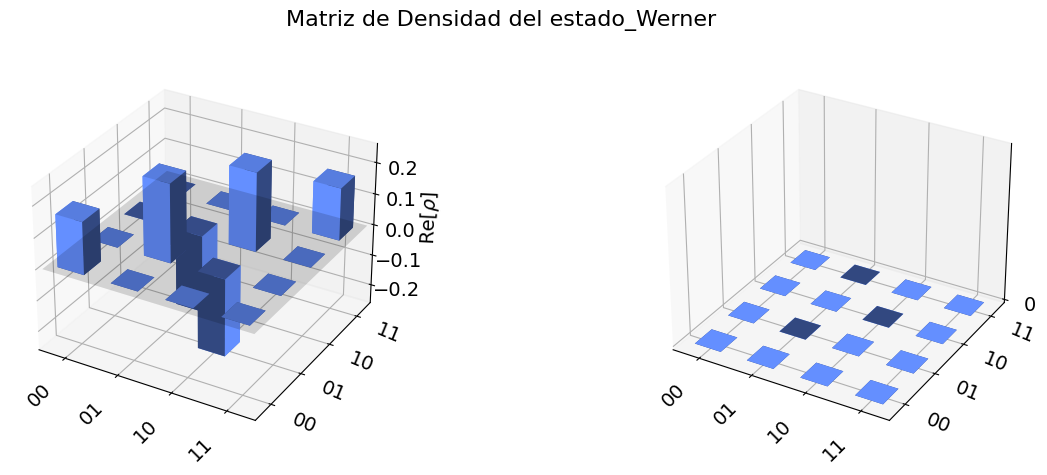

In [84]:
F=0.5
rho_werner = estado_werner(F)
print(f"F = {F}:")

display(array_to_latex(DensityMatrix(rho_werner),prefix="\\text{Matriz de densidad} = "))
rho_werner_dm = DensityMatrix(rho_werner)  # Convierte rho_werner a un objeto DensityMatrix
rho_w = pureza(rho_werner)
display(Math(r'\text{{Pureza del estado Werner: }} {:.2f}'.format(rho_w)))
plot_state_city(rho_werner_dm , title="Matriz de Densidad del estado_Werner")



# Traza o descomposicion del sistema total en subsistemas

La traza parcial de un estado cuántico de dos qubits $\rho$ respecto a uno de los qubits, digamos el qubit $A$, se calcula tomando la traza de la matriz de densidad $\rho$ respecto a todas las combinaciones posibles de estados del qubit $A$, y luego obteniendo una matriz de menor dimensión que representa el estado del otro qubit, llamémoslo $B$. Esta operación se realiza mediante la siguiente fórmula:

\begin{equation}
Tr_A(\rho) = \sum_i \langle i|\rho|i\rangle
\end{equation}

donde $|i\rangle$ representa los estados de la base computacional del qubit $A$, es decir, $|0\rangle$ y $|1\rangle$. Al calcular la traza parcial respecto al qubit $A$, obtendremos una matriz de densidad que representa el estado del qubit $B$.

La traza parcial se puede entender como un proceso de promedio sobre todas las posibles mediciones del qubit $A$, lo que resulta en un estado reducido para el qubit $B$, eliminando la información sobre el qubit $A$. Esto es útil cuando estamos interesados en estudiar las propiedades y comportamiento del sistema cuántico en el subsistema $B$, sin preocuparnos por lo que está sucediendo en el subsistema $A$.

In [90]:
#Traza o descomposicion del sistema total en subsistemas
from qiskit.quantum_info import partial_trace

# Crea el estado de Bell |Ψ-⟩
qc = estado_bell(0)

# Ejecuta el circuito para obtener el estado final
vector_estado = Statevector.from_instruction(qc)
array_vector_estado = vector_estado.data

# Calcula la matriz de densidad del estado total
rho_total = np.outer(array_vector_estado, np.conj(array_vector_estado))
display(array_to_latex(DensityMatrix(rho_total),prefix="\\text{Matriz de densidad } \\rho_{01} = "))


# Calcula la traza parcial sobre el primer qubit (qubit 0)
rho_1 = partial_trace(rho_total, [0])

# Calcula la traza parcial sobre el segundo qubit (qubit 1)
rho_0 = partial_trace(rho_total, [1])

# Muestra las matrices de densidad de los qubits individuales
print("Matriz de densidad del qubit 0:")
display(array_to_latex(DensityMatrix(rho_0.data), prefix="\\rho_0 = "))
print("Matriz de densidad del qubit 1:")
display(array_to_latex(DensityMatrix(rho_1.data), prefix="\\rho_1 = "))

# Calcula la pureza de cada subsistema
pureza_0 = pureza(rho_0.data)
pureza_1 = pureza(rho_1.data)

# Muestra la pureza de cada subsistema
display(Math("Pureza del qubit 0: {:.2f}".format(pureza_0)))
display(Math("Pureza del qubit 1: {:.2f}".format(pureza_1)))


<IPython.core.display.Latex object>

Matriz de densidad del qubit 0:


<IPython.core.display.Latex object>

Matriz de densidad del qubit 1:


<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Entropía de Von Neumann


La entropía de Von Neumann es una medida fundamental de la incertidumbre y el desorden en un sistema cuántico. Se define como la traza negativa de la matriz de densidad \(\rho\) multiplicada por su logaritmo en base 2:

\begin{equation}
S(\rho) = -\text{Tr}(\rho \log_2 \rho)
\end{equation}

Donde \(\rho\) es la matriz de densidad del sistema. La entropía de Von Neumann cuantifica la cantidad promedio de información necesaria para describir el estado cuántico del sistema. Cuando el estado es completamente puro, es decir, cuando \(\rho\) representa un estado cuántico puro, la entropía de Von Neumann es cero, lo que significa que el sistema está en un estado determinado sin incertidumbre. En contraste, cuando el estado es un estado mixto, lo que significa que \(\rho\) representa una combinación estadística de varios estados cuánticos puros, la entropía de Von Neumann es mayor que cero, lo que indica la presencia de incertidumbre y mezcla estadística en el sistema.

La entropía de Von Neumann también proporciona información sobre el grado de entrelazamiento cuántico presente en el sistema. Los sistemas cuánticos entrelazados tienen una entropía de Von Neumann menor que los sistemas no entrelazados. Además, la entropía de Von Neumann es una cantidad invariante bajo transformaciones unitarias del sistema, lo que la hace una medida de información cuántica robusta y universal.

La entropía de Von Neumann juega un papel crucial en el estudio de la teoría de la información cuántica, la mecánica cuántica y la termodinámica cuántica. Es una herramienta fundamental para comprender y caracterizar el comportamiento de sistemas cuánticos complejos y es ampliamente utilizada en diversas aplicaciones en el campo de la computación cuántica, la criptografía cuántica y la simulación cuántica.


# La información mutua cuántica

La información mutua cuántica es una medida de la cantidad de información que se puede obtener acerca de un subsistema observando otro subsistema. Es una extensión del concepto clásico de información mutua al caso cuántico.

La información mutua cuántica \(I(A,B)\) entre dos subsistemas \(A\) y \(B\) se define como:

\begin{equation}
I(A,B) = S(A) + S(B) - S(AB)
\end{equation}

donde \(S(A)\), \(S(B)\) y \(S(AB)\) son las entropías de Von Neumann de los subsistemas \(A\), \(B\) y del sistema total \(AB\), respectivamente.



En el caso de un estado separable (no entrelazado), la información mutua cuántica es cero, ya que los estados de los qubits son independientes.


In [107]:
#Entropía de los subsitemas
from qiskit.quantum_info import partial_trace, entropy

# Crea el estado de Bell |Ψ-⟩
qc = estado_bell(0)

# Ejecuta el circuito para obtener el estado final
vector_estado = Statevector.from_instruction(qc)
array_vector_estado = vector_estado.data

# Calcula la matriz de densidad del estado total
rho_total = np.outer(array_vector_estado, np.conj(array_vector_estado))

# Calcula la entropía de Von Neumann del sistema completo
entropia_total = entropy(rho_total)

# Calcula la traza parcial sobre el primer qubit (qubit 0)
rho_1 = partial_trace(rho_total, [0])

# Calcula la traza parcial sobre el segundo qubit (qubit 1)
rho_0 = partial_trace(rho_total, [1])

# Calcula la entropía de Von Neumann del qubit 0
entropia_0 = entropy(rho_0)

# Calcula la entropía de Von Neumann del qubit 1
entropia_1 = entropy(rho_1)

# Calcula la información mutua cuántica
informacion_mutua = entropia_0 + entropia_1 - entropia_total

# Muestra las matrices de densidad de los qubits individuales
print("Matriz de densidad del qubit 0:")
display(array_to_latex(DensityMatrix(rho_0), prefix="\\rho_0 = "))
print("Matriz de densidad del qubit 1:")
display(array_to_latex(DensityMatrix(rho_1), prefix="\\rho_1 = "))

# Muestra la entropía de Von Neumann de cada subsistema
display(Math("Entropía de Von Neumann del sistema completo: {:.2f}".format(entropia_total)))
display(Math("Entropía de Von Neumann del qubit 0: {:.2f}".format(entropia_0)))
display(Math("Entropía de Von Neumann del qubit 1: {:.2f}".format(entropia_1)))

# Muestra la información mutua cuántica
display(Math("Información mutua cuántica: {:.2f}".format(informacion_mutua)))


Matriz de densidad del qubit 0:


<IPython.core.display.Latex object>

Matriz de densidad del qubit 1:


<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>